<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/Assignment_2/D1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2 solution for D1.csv by VIPIN_2011MT22**

In [2]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit

In [3]:
#importing the dataset

D1 = pd.read_csv('D1.csv', index_col='Time')
data = D1['Ads']
D1.head(250)

,Ads
Time,
13-09-2017 00:00,80115
13-09-2017 01:00,79885
13-09-2017 02:00,89325
13-09-2017 03:00,101930
13-09-2017 04:00,121630
...,...
21-09-2017 19:00,155890
21-09-2017 20:00,123395
21-09-2017 21:00,103080


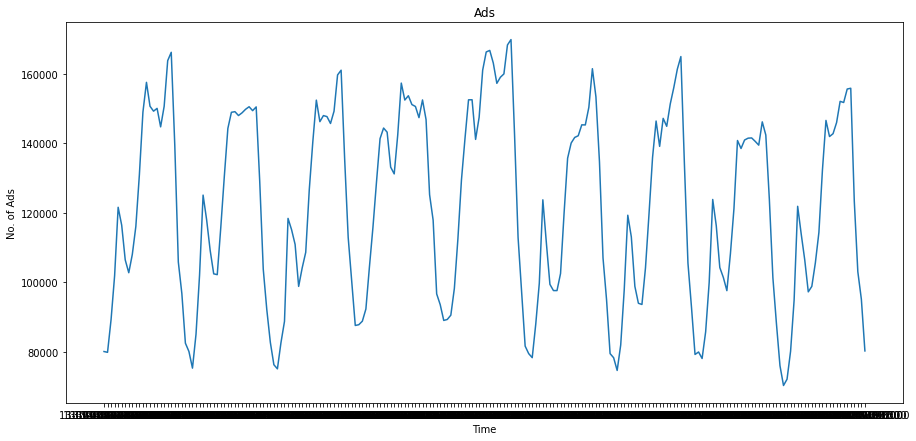

In [4]:
#plotting the time series

plt.figure(figsize=(15, 7))
plt.plot(D1['Ads'])
plt.xlabel("Time")
plt.ylabel("No. of Ads")
plt.title('Ads')
plt.show()

In [5]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

#Single Exponential Smoothing

In [6]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [7]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [8]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=1), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=1), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=1), "\n")

MSE for alpha =.4 is   360754830.47347444 

MSE for alpha =.35 is  403008753.16323924 

MSE for alpha =.65 is  226398027.45353046 

MSE for alpha =.85 is  168803562.00671294 



from different combinations of alpha, for alpha = .85, MSE is minimum

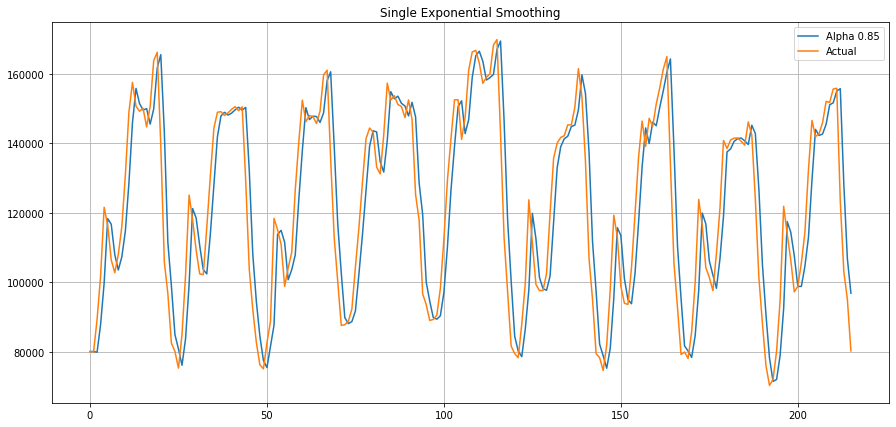

In [9]:
#plotting single exponential smoothing with actual and forecast value

def plot_singleexponentialsmoothing(data, alphas,n):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
        plt.plot(single_exponential_smoothing(data, alpha,n), label='Alpha {}'.format(alpha))

    plt.plot(data_n(data,n), label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Single Exponential Smoothing')
    plt.grid(True)

data = D1['Ads']
plot_singleexponentialsmoothing(data.values, [.85],1)

#Double Exponential Smoothing

In [10]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [11]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [12]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=1), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=1), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2  is  446004305.8343224 

MSE for alpha =.35, beta = .5  is  471406727.69204175 

MSE for alpha =.85, beta = .6  is  156393402.81879658 

MSE for alpha =.45, beta = .6  is  368692000.25810254 

MSE for alpha =.7,  beta = .55 is  209699346.09292415 

MSE for alpha =.2,  beta = .6  is  767915681.8640752 



from different combinations of alpha & beta, for alpha = .85 & beta = .6, MSE is minimum

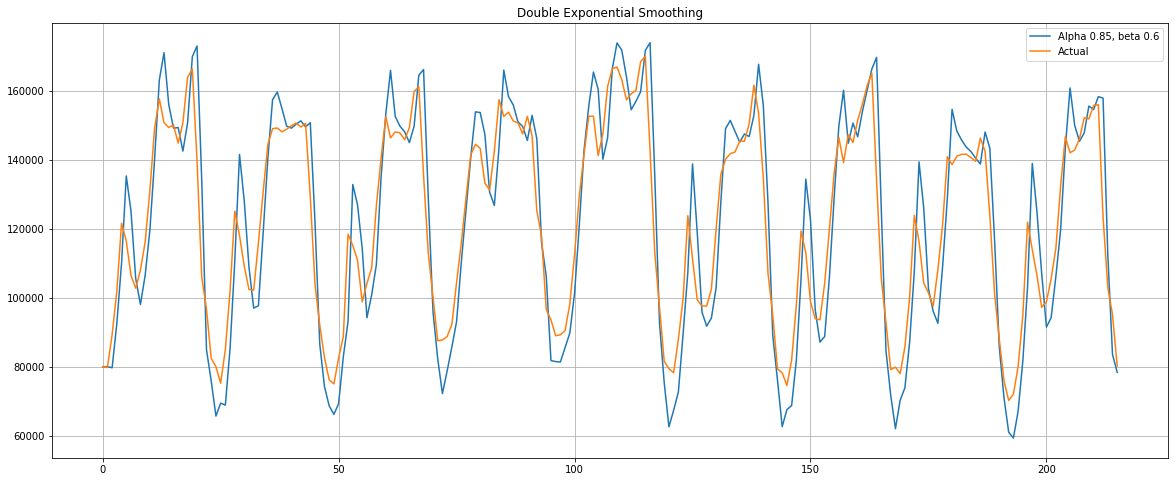

In [13]:
#plotting double exponential smoothing with actual and forecast value

def plot_doubleexponentialsmoothing(data, alphas, betas, interval):
  plt.figure(figsize=(20, 8))
  for alpha, beta in zip(alphas, betas):
    results = double_exponential_smoothing(data, alpha, beta, interval)
    plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Double Exponential Smoothing')
  plt.grid(True)

plot_doubleexponentialsmoothing(data.values, [.85], [0.6], 1)


#Triple Exponential Smoothing

In [14]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [15]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [16]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,24, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,24, .35, .5, .3, interval=1), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,24, .45, .6, .4 ,interval=1), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,24, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,24, .3, .5, .55, interval=1), "\n")
print("MSE for alpha =.45, beta = .65, gamma = .45 is " ,MSE_TES(data,24, .45, .65, .45 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .25, gamma = .50 is " ,MSE_TES(data,24, .7, .25 , .50,interval=1), "\n")
print("MSE for alpha =.35, beta = .2,  gamma = .1  is " ,MSE_TES(data,24, .35, .2, .1, interval=1), "\n")
print("MSE for alpha =.9,  beta = .2,  gamma = .1  is " ,MSE_TES(data, 24, .9, .2,.1 ,interval=1), "\n")
print("MSE for alpha =.85, beta = .3,  gamma = .1  is " ,MSE_TES(data,24, .85, .3, .1 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  8141440.655597995 

MSE for alpha =.35, beta = .5,  gamma = .3  is  20787293.18996541 

MSE for alpha =.45, beta = .6,  gamma = .4  is  17156424.64453818 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  8141440.655597995 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  22856853.50098467 

MSE for alpha =.45, beta = .65, gamma = .45 is  20111740.487354252 

MSE for alpha =.7,  beta = .25, gamma = .50 is  3442370.8392143315 

MSE for alpha =.35, beta = .2,  gamma = .1  is  21377701.586126786 

MSE for alpha =.9,  beta = .2,  gamma = .1  is  2327997.3044041367 

MSE for alpha =.85, beta = .3,  gamma = .1  is  4119640.978836244 



from different combinations of alpha, beta, gamma ,
 for alpha = .9 , beta = .2   , gamma= .1   , MSE is minimum

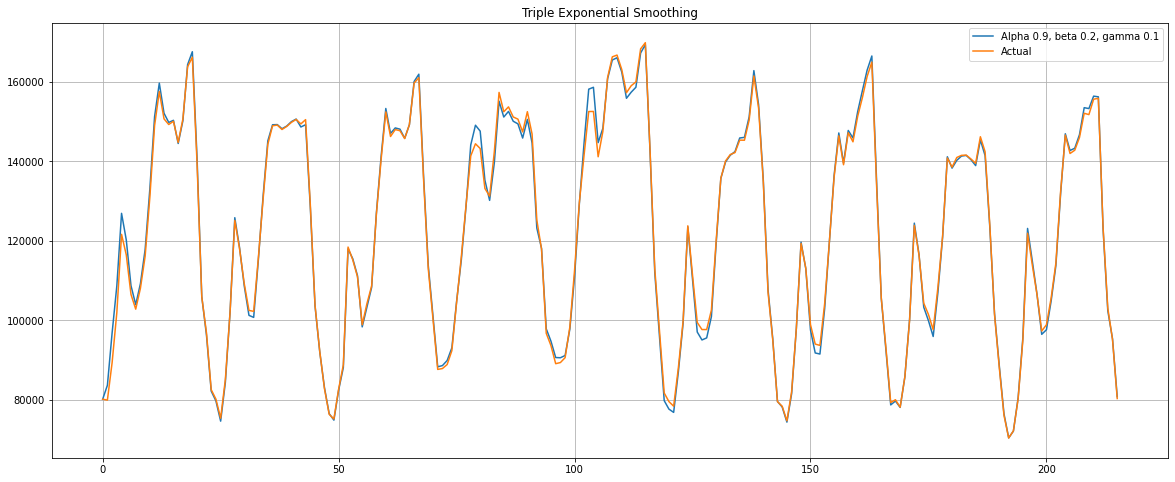

In [17]:
#plotting the triple exponential function with actual and predicted value

def plot_triple_exponential_smoothing(data, slen, alphas, betas,gammas, interval):
  plt.figure(figsize=(20, 8))
  for alpha, beta , gamma in zip(alphas, betas, gammas):
    results = triple_exponential_smoothing(data, 24, alpha, beta, gamma,interval)
    plt.plot(results, label='Alpha {}, beta {}, gamma {}'.format(alpha, beta, gamma))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Triple Exponential Smoothing')
  plt.grid(True)

plot_triple_exponential_smoothing(data.values, 24,[0.9], [0.2], [.1], 1)

#KPSS Test

In [18]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D1[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Ads')

Results of KPSS Test for  Ads
Test Statistic            0.085159
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


>For the given dataset D1 , the value of the test statistic is less than the critical value at all confidence intervals in the KPSS test, hence we fail to reject the null hypothesis i.e. the series is stationary.

#ADF Test

In [19]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D1[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('Ads')

Results of Dickey-Fuller Test for  Ads 

Test Statistic                -7.089634e+00
p-value                        4.444804e-10
#Lags Used                     9.000000e+00
Number of Observations Used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64


>For the given dataset D1 , the value of the test statistic is less than the critical value at all confidence intervals in the ADF test, hence we can reject the null hypothesis i.e. the series is stationary.

Note:  The signed values should be compared and not the absolute values.

**Since, both tests conclude that the series is stationary, therefore, the dataset is concluded as Stationary.**

#single exponential smoothing with different intervals

In [20]:
#prediction of alpha beta gamma for minimum MSE for i hour inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 1 hours is " , MSE_SES(data, .85, interval=1), "\n")
print("MSE for alpha =..8 with interval = 1 hours is " , MSE_SES(data, .8, interval=1), "\n")
print("MSE for alpha =..7 with interval = 1 hours is " , MSE_SES(data, .7, interval=1), "\n")

MSE for alpha =.85 with interval = 1 hours is  168803562.00671294 

MSE for alpha =..8 with interval = 1 hours is  180650995.23190618 

MSE for alpha =..7 with interval = 1 hours is  209184750.65174004 



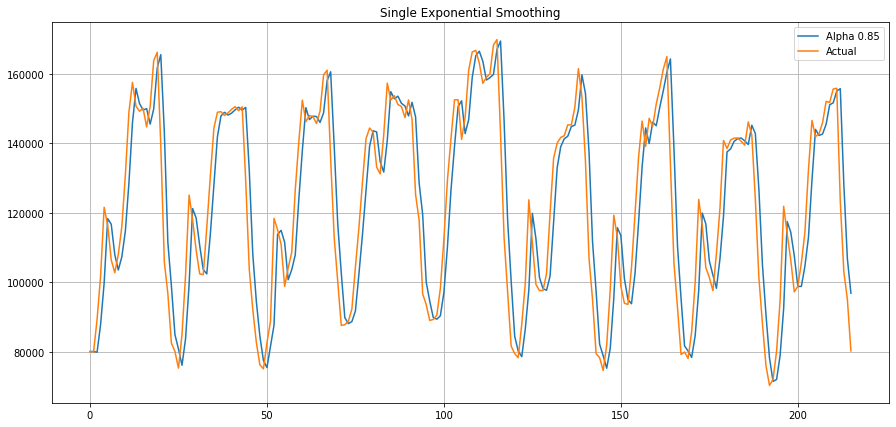

In [21]:
# plotting for least MSE for 1 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.85],1)

In [22]:
#prediction of alpha beta gamma for minimum MSE for 2 hour inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 2 hours is " , MSE_SES(data, .85, interval=2), "\n")
print("MSE for alpha =.7 with interval = 2 hours is " , MSE_SES(data, .7, interval=2), "\n")
print("MSE for alpha =.9 with interval = 2 hours is " , MSE_SES(data, .9, interval=2), "\n")

MSE for alpha =.85 with interval = 2 hours is  193257809.50463384 

MSE for alpha =.7 with interval = 2 hours is  250707395.5636314 

MSE for alpha =.9 with interval = 2 hours is  178669883.2906767 



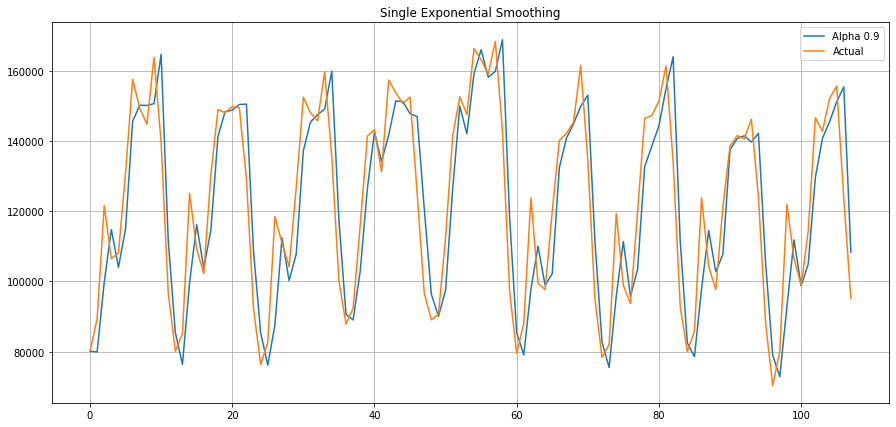

In [23]:
# plotting for least MSE for 2 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.9],2)

In [24]:
#prediction of alpha beta gamma for minimum MSE for 4 hour inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 4 hours is " , MSE_SES(data, .85, interval=4), "\n")
print("MSE for alpha =.7 with interval = 4 hours  is " , MSE_SES(data, .7, interval=4), "\n")
print("MSE for alpha =.75 with interval = 4 hours is " , MSE_SES(data, .75, interval=4), "\n")

MSE for alpha =.85 with interval = 4 hours is  250474834.575082 

MSE for alpha =.7 with interval = 4 hours  is  315860010.58775073 

MSE for alpha =.75 with interval = 4 hours is  291709041.67450416 



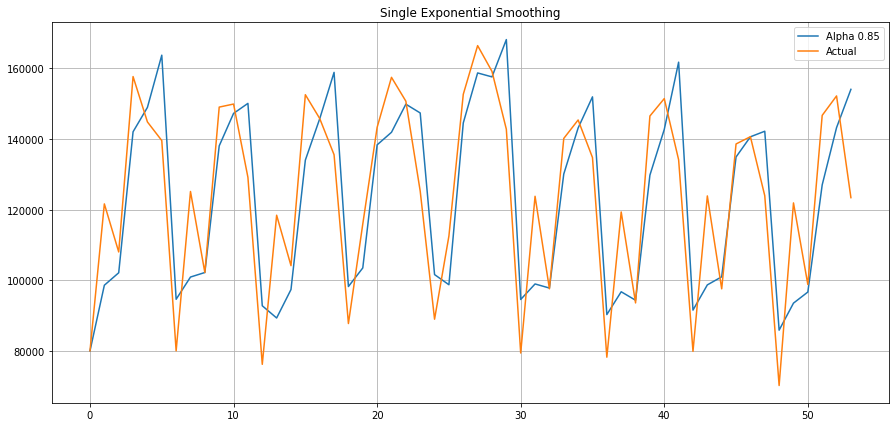

In [25]:
# plotting for least MSE for 4 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.85],4)

In [26]:
#prediction of alpha beta gamma for minimum MSE for 8 hour inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 8hours is " , MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.7 with interval = 8 hours is " , MSE_SES(data, .7, interval=8), "\n")
print("MSE for alpha =.9 with interval = 8 hours is " , MSE_SES(data, .9, interval=8), "\n")

MSE for alpha =.85 with interval = 8hours is  72483950.5064277 

MSE for alpha =.7 with interval = 8 hours is  193294832.25589275 

MSE for alpha =.9 with interval = 8 hours is  43696315.39090701 



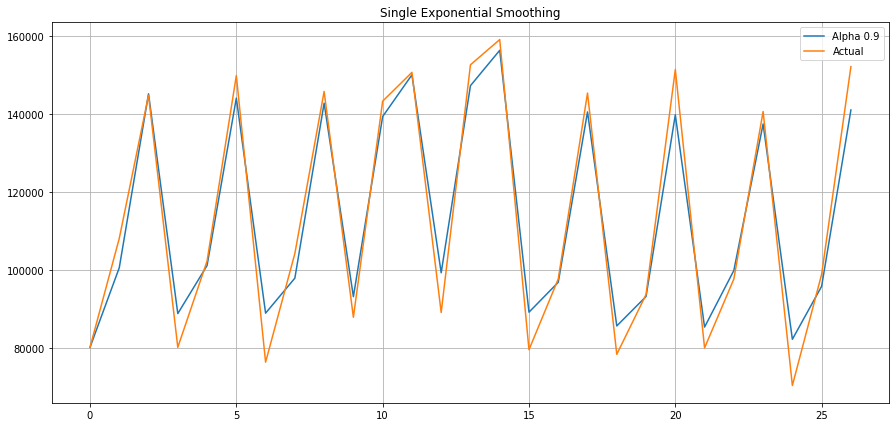

In [27]:
# plotting for least MSE for 8 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.9],8)

In [28]:
#prediction of alpha beta gamma for minimum MSE for 12 hour inervals for single exponential smoothing

print("MSE for alpha =..85 with interval = 12 hours is " , MSE_SES(data, .85, interval=12), "\n")
print("MSE for alpha =.9 with interval = 12 hours   is " , MSE_SES(data, .9, interval=12), "\n")
print("MSE for alpha =.95 with interval = 12 hours  is " , MSE_SES(data, .95, interval=12), "\n")

MSE for alpha =..85 with interval = 12 hours is  194101051.60369378 

MSE for alpha =.9 with interval = 12 hours   is  137816339.2056716 

MSE for alpha =.95 with interval = 12 hours  is  89455523.44838831 



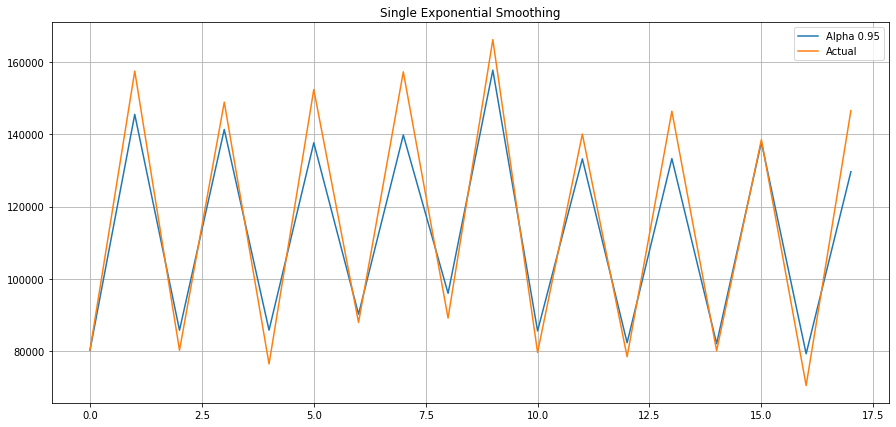

In [29]:
# plotting for least MSE for 12 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],12)

In [30]:
#prediction of alpha beta gamma for minimum MSE for 24 hour inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 24 hours is " , MSE_SES(data, .85, interval=24), "\n")
print("MSE for alpha =.9 with interval = 24 hours is " , MSE_SES(data, .9, interval=24), "\n")
print("MSE for alpha =.95 with interval = 24 hours is " , MSE_SES(data, .95, interval=24), "\n")

MSE for alpha =.85 with interval = 24 hours is  12727481.233959094 

MSE for alpha =.9 with interval = 24 hours is  12379061.170922492 

MSE for alpha =.95 with interval = 24 hours is  12112194.029240392 



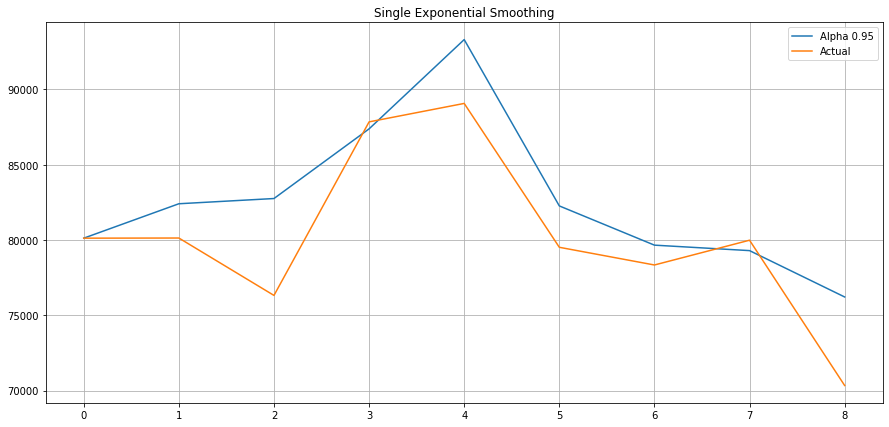

In [31]:
# plotting for least MSE for 24 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],24)

In [32]:
#prediction of alpha beta gamma for minimum MSE for 48 hour inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 48 hours is " , MSE_SES(data, .85, interval=48), "\n")
print("MSE for alpha =.8 with interval = 48 hours is " , MSE_SES(data, .8, interval=48), "\n")
print("MSE for alpha =.95 with interval = 48 hours is " , MSE_SES(data, .95, interval=48), "\n")

MSE for alpha =.85 with interval = 48 hours is  19302807.862758607 

MSE for alpha =.8 with interval = 48 hours is  20025473.927999966 

MSE for alpha =.95 with interval = 48 hours is  18888168.759292208 



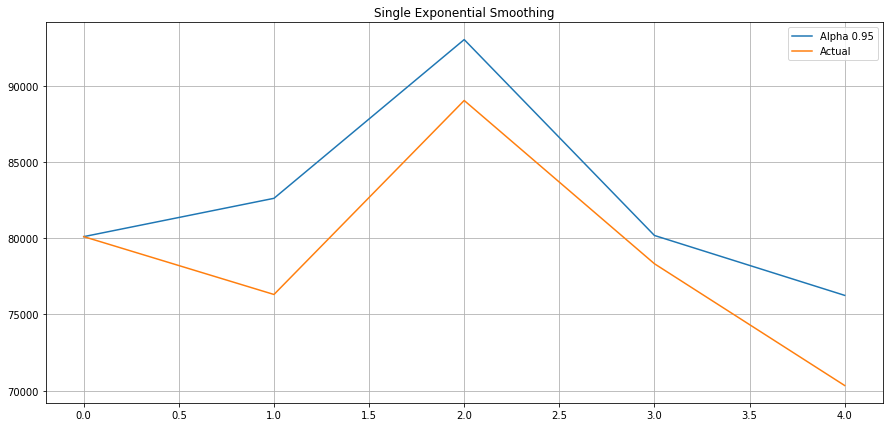

In [67]:
# plotting for least MSE for 48 hour intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],48)

In [34]:
#tabulate minimum MSE for different intervals for single exponential smoothing

from tabulate import tabulate
print(tabulate([['1 hour', 168803562], ['2 hour', 178669883],['4 hour', 250474834],['8 hour', 43696315],['12 hour', 89455523],['24 hour', 12112194],['48 hour', 18888168]], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   |   minimum MSE |
|-------------+---------------|
| 1 hour      |     168803562 |
| 2 hour      |     178669883 |
| 4 hour      |     250474834 |
| 8 hour      |      43696315 |
| 12 hour     |      89455523 |
| 24 hour     |      12112194 |
| 48 hour     |      18888168 |


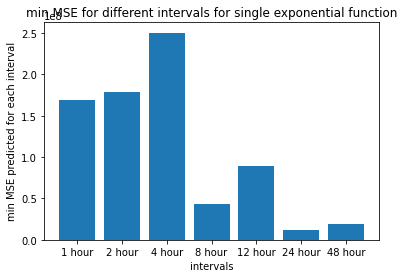

In [35]:
# Bar chart comparison for min MSE of different intervals for single exponential function

import matplotlib.pyplot as plt
plt.bar(['1 hour','2 hour','4 hour','8 hour','12 hour','24 hour','48 hour'], [168803562, 178669883, 250474834, 43696315, 89455523, 12112194,18888168])
plt.title('min MSE for different intervals for single exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Double exponential smoothing with different intervals

In [36]:
#prediction of alpha beta gamma for minimum MSE for 1 hour inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .6 with interval = 1 hour  is  " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.75, beta = .5 with interval = 1 hour  is  " ,MSE_DES(data, .75, .5 ,interval=1), "\n")
print("MSE for alpha =.8, beta = .4 with interval = 1 hour   is  " ,MSE_DES(data, .8, .4 ,interval=1), "\n")

MSE for alpha =.85, beta = .6 with interval = 1 hour  is   156393402.81879658 

MSE for alpha =.75, beta = .5 with interval = 1 hour  is   192740983.68870443 

MSE for alpha =.8, beta = .4 with interval = 1 hour   is   181447375.69125554 



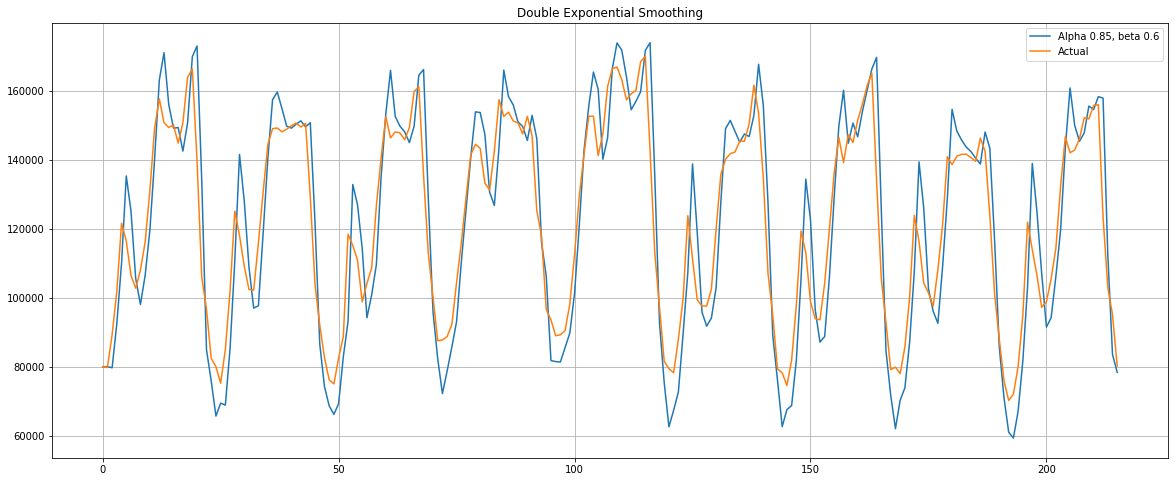

In [37]:
# plotting for least MSE for 1 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.6], 1)

In [38]:
#prediction of alpha beta gamma for minimum MSE for 2 hour inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 1 hour is  " ,MSE_DES(data, .85, .5 ,interval=2), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 1 hour  is  " ,MSE_DES(data, .9, .6 ,interval=2), "\n")
print("MSE for alpha =.7, beta = .4 with interval = 1 hour  is  " ,MSE_DES(data, .7, .4 ,interval=2), "\n")


MSE for alpha =.85, beta = .5 with interval = 1 hour is   592923091.6737137 

MSE for alpha =.9, beta = .6 with interval = 1 hour  is   587489860.9199923 

MSE for alpha =.7, beta = .4 with interval = 1 hour  is   665821479.607577 



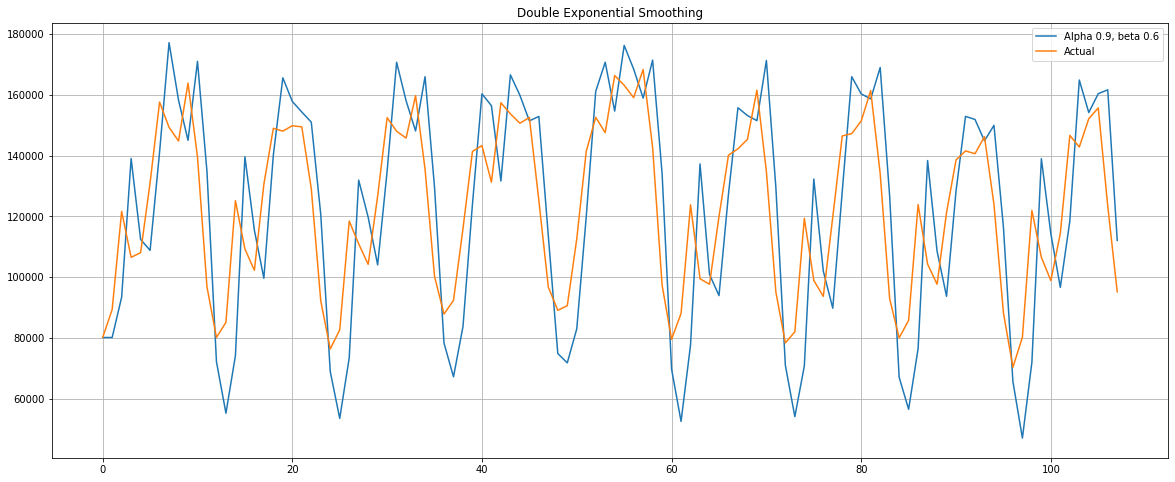

In [39]:
# plotting for least MSE for 2 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.9], [0.6], 2)

In [40]:
#prediction of alpha beta gamma for minimum MSE for 4 hour inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .6 with interval = 1 hour  is  " ,MSE_DES(data, .85, .6 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .65 with interval = 1 hour  is  " ,MSE_DES(data, .8, .65 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .55 with interval = 1 hour  is  " ,MSE_DES(data, .8, .55 ,interval=2), "\n")

MSE for alpha =.85, beta = .6 with interval = 1 hour  is   604808962.9856225 

MSE for alpha =.8, beta = .65 with interval = 1 hour  is   630305698.6627529 

MSE for alpha =.8, beta = .55 with interval = 1 hour  is   618963030.9565854 



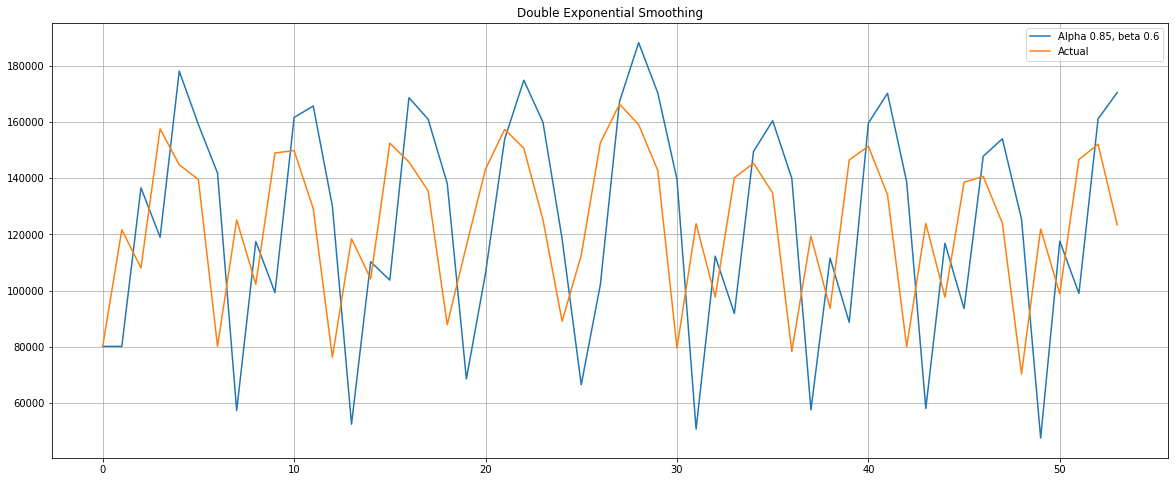

In [41]:
# plotting for least MSE for 4 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.6], 4)

In [42]:
#prediction of alpha beta gamma for minimum MSE for 8 hour inervals for Double exponential smoothing

print("MSE for alpha =.75, beta = .5 with interval = 1 hour   is  " ,MSE_DES(data, .75, .5 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .4 with interval = 1 hour    is  " ,MSE_DES(data, .8, .4 ,interval=2), "\n")
print("MSE for alpha =.85, beta = .55 with interval = 1 hour  is  " ,MSE_DES(data, .85, .55 ,interval=2), "\n")

MSE for alpha =.75, beta = .5 with interval = 1 hour   is   639424694.3569207 

MSE for alpha =.8, beta = .4 with interval = 1 hour    is   605359240.4380488 

MSE for alpha =.85, beta = .55 with interval = 1 hour  is   598593160.4442788 



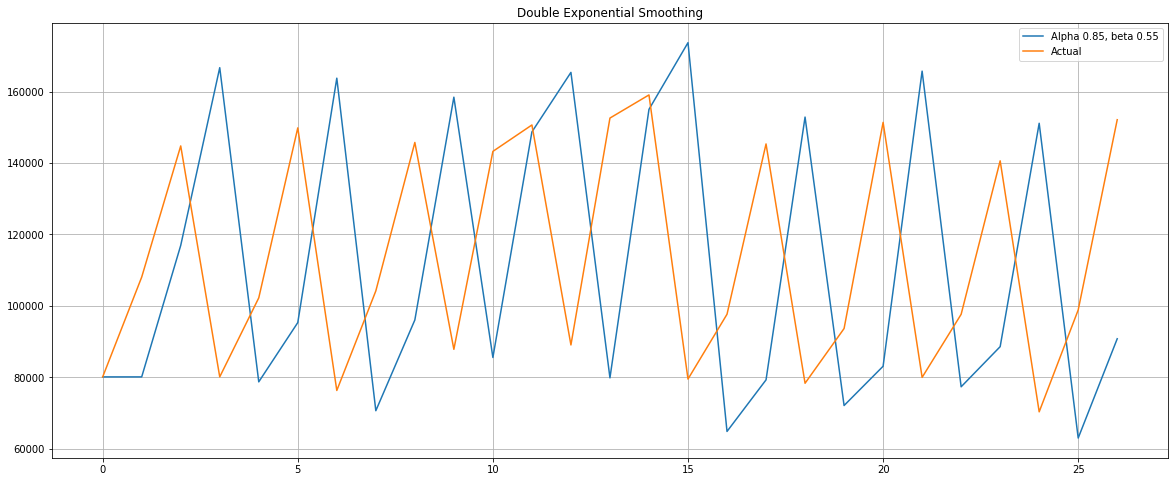

In [43]:
# plotting for least MSE for 8 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.55], 8)

In [44]:
#prediction of alpha beta gamma for minimum MSE for 12 hour inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 12 hour is  " ,MSE_DES(data, .5, .5 ,interval=12), "\n")
print("MSE for alpha =.9, beta = .4 with interval = 12 hour  is  " ,MSE_DES(data, .4, .4 ,interval=12), "\n")
print("MSE for alpha =.9, beta = .5 with interval = 12 hour  is  " ,MSE_DES(data, .3, .5 ,interval=12), "\n")

MSE for alpha =.85, beta = .5 with interval = 12 hour is   2716719928.771744 

MSE for alpha =.9, beta = .4 with interval = 12 hour  is   2270630570.21046 

MSE for alpha =.9, beta = .5 with interval = 12 hour  is   2045023724.4884562 



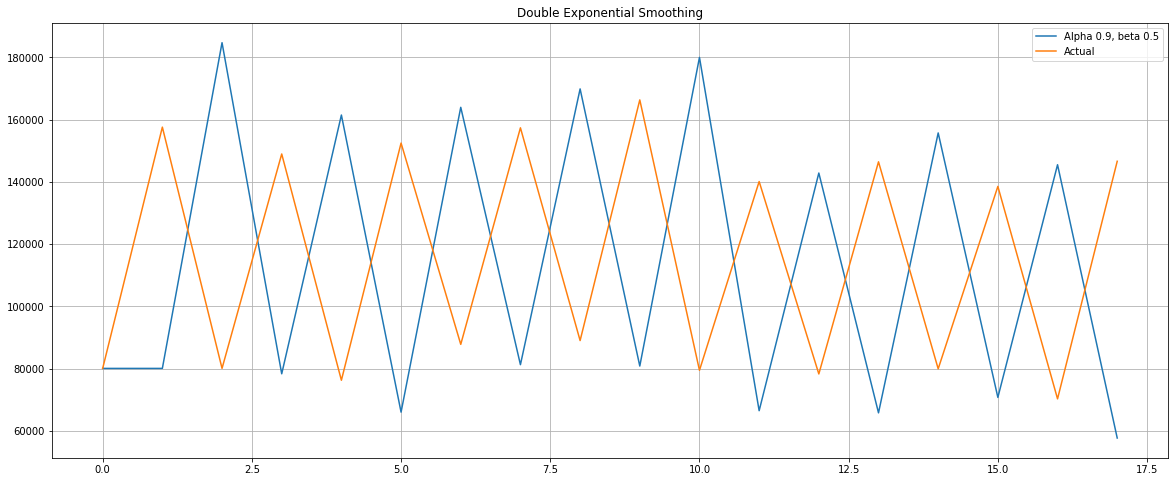

In [45]:
# plotting for least MSE for 12 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.9], [0.5], 12)

In [46]:
#prediction of alpha beta gamma for minimum MSE for 24 hour inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 24 hour  is  " ,MSE_DES(data, .85, .5 ,interval=24), "\n")
print("MSE for alpha =.9, beta = .55 with interval = 24 hour  is  " ,MSE_DES(data, .9, .55 ,interval=24), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 24 hour   is  " ,MSE_DES(data, .9, .6 ,interval=24), "\n")

MSE for alpha =.85, beta = .5 with interval = 24 hour  is   47694538.228604406 

MSE for alpha =.9, beta = .55 with interval = 24 hour  is   51138951.07033561 

MSE for alpha =.9, beta = .6 with interval = 24 hour   is   53052555.8370949 



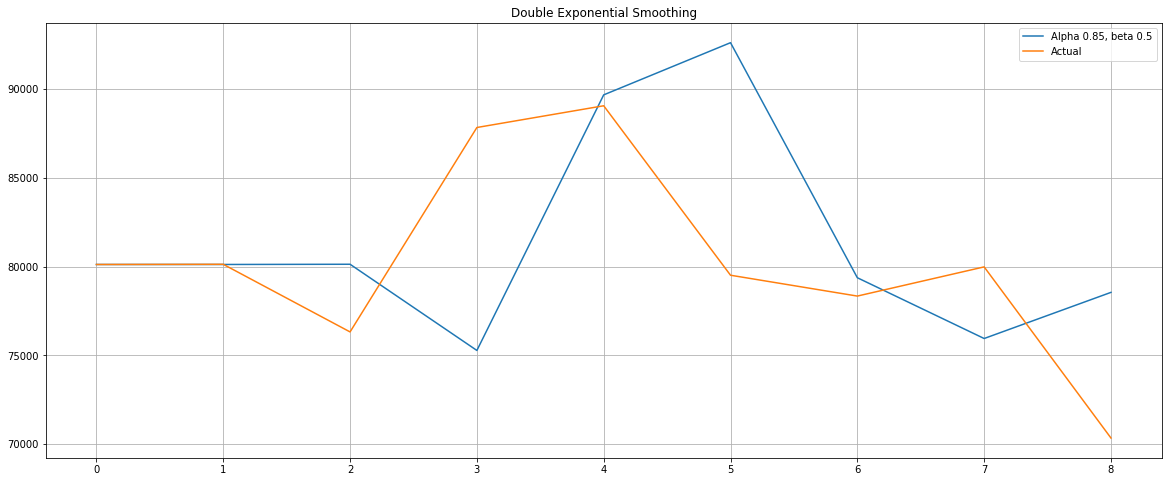

In [47]:
# plotting for least MSE for 24 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.5], 24)

In [48]:
#prediction of alpha beta gamma for minimum MSE for 48 hour inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 48 hour  is  " ,MSE_DES(data, .85, .5 ,interval=48), "\n")
print("MSE for alpha =.9, beta = .55 with interval = 48 hour  is  " ,MSE_DES(data, .9, .55 ,interval=48), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 48 hour   is  " ,MSE_DES(data, .9, .6 ,interval=48), "\n")

MSE for alpha =.85, beta = .5 with interval = 48 hour  is   89344211.67873259 

MSE for alpha =.9, beta = .55 with interval = 48 hour  is   96474970.65378287 

MSE for alpha =.9, beta = .6 with interval = 48 hour   is   99712490.7642344 



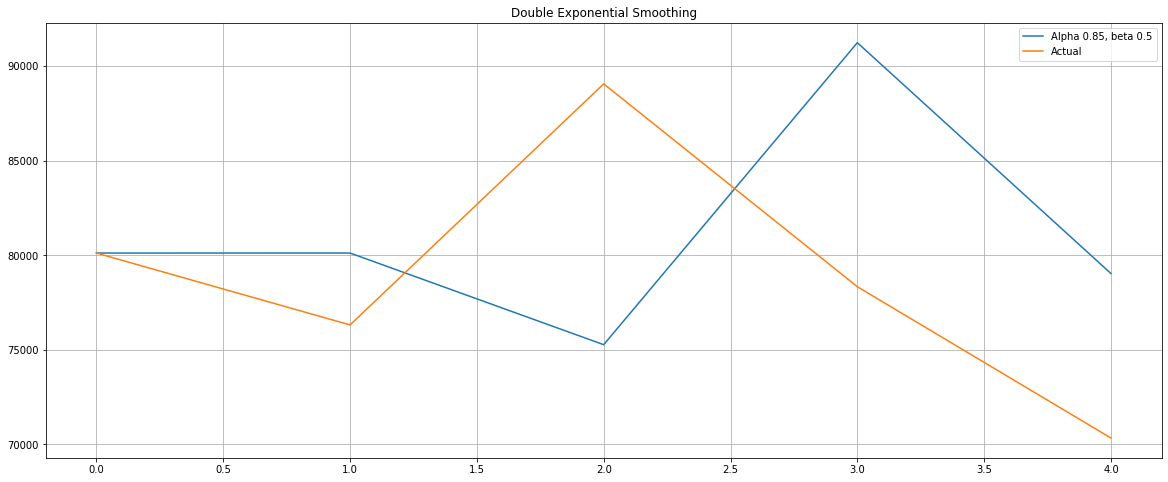

In [49]:
# plotting for least MSE for 48 hour intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.5], 48)

In [50]:
#tabulate minimum MSE for different intervals for double exponential smoothing

from tabulate import tabulate
print(tabulate([['1 hour', 156393402], ['2 hour', 587489860],['4 hour', 604808962],['8 hour', 598593160],['12 hour', 204502372],['24 hour', 47694538],['48 hour', 89344211]], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   |   minimum MSE |
|-------------+---------------|
| 1 hour      |     156393402 |
| 2 hour      |     587489860 |
| 4 hour      |     604808962 |
| 8 hour      |     598593160 |
| 12 hour     |     204502372 |
| 24 hour     |      47694538 |
| 48 hour     |      89344211 |


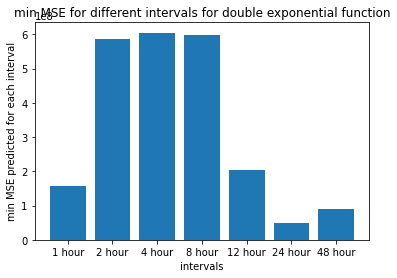

In [51]:
# Bar chart comparison for min MSE of different intervals for double exponential function

import matplotlib.pyplot as plt
plt.bar(['1 hour','2 hour','4 hour','8 hour','12 hour','24 hour','48 hour'], [156393402, 587489860 , 604808962, 598593160,204502372, 47694538, 89344211])
plt.title('min MSE for different intervals for double exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Triple exponential smoothing with different intervals

In [52]:
#prediction of alpha beta gamma for minimum MSE for 1 hour inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .1 with interval = 1 hour is " ,MSE_TES(data,24, .9, .2 , .1,interval=1), "\n")
print("MSE for alpha =.9, beta = .2, gamma = .2 with interval = 1 hour is " ,MSE_TES(data,24, .9, .2 , .2,interval=1), "\n")
print("MSE for alpha =.85, beta = .2, gamma = .2 with interval = 1 houris " ,MSE_TES(data,24, .85, .2 , .2,interval=1), "\n")

MSE for alpha =.9, beta = .2, gamma = .1 with interval = 1 hour is  2327997.3044041367 

MSE for alpha =.9, beta = .2, gamma = .2 with interval = 1 hour is  2335860.642345449 

MSE for alpha =.85, beta = .2, gamma = .2 with interval = 1 houris  2370537.8426265204 



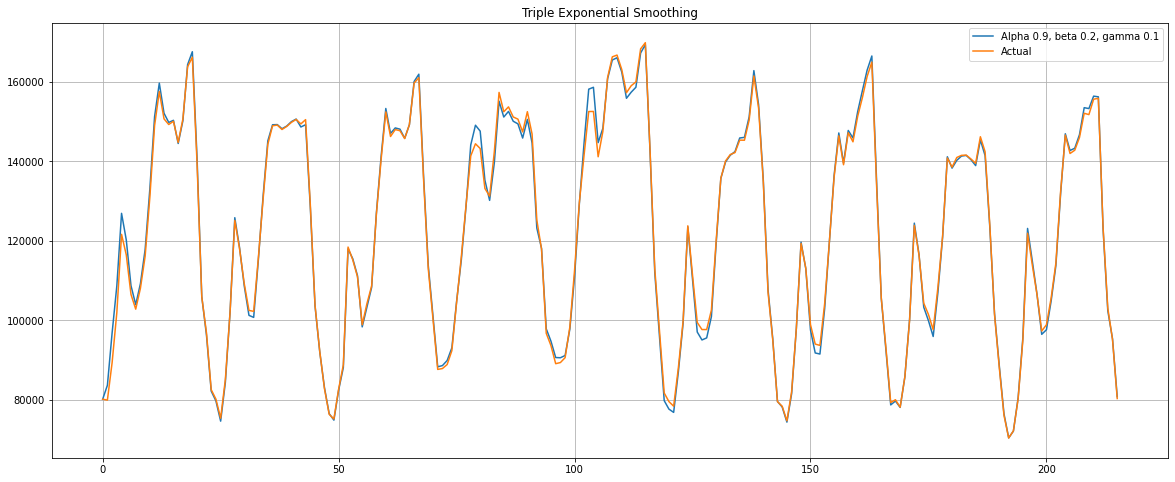

In [53]:
# plotting for least MSE for 1 hour according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 24,[0.9], [0.2], [.1], 1)

In [54]:
#prediction of alpha beta gamma for minimum MSE for 2 hour inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .1 with interval = 2 hour   is " ,MSE_TES(data,24, .9, .2 , .1,interval=2), "\n")
print("MSE for alpha =.9, beta = .2, gamma = .15 with interval = 2 hour  is " ,MSE_TES(data,24, .9, .2 , .15,interval=2), "\n")
print("MSE for alpha =.85, beta = .2, gamma = .15 with interval = 2 hour is " ,MSE_TES(data,24, .85, .2 , .15,interval=2), "\n")

MSE for alpha =.9, beta = .2, gamma = .1 with interval = 2 hour   is  3262264.674225294 

MSE for alpha =.9, beta = .2, gamma = .15 with interval = 2 hour  is  3267429.1017125617 

MSE for alpha =.85, beta = .2, gamma = .15 with interval = 2 hour is  3389999.9273760435 



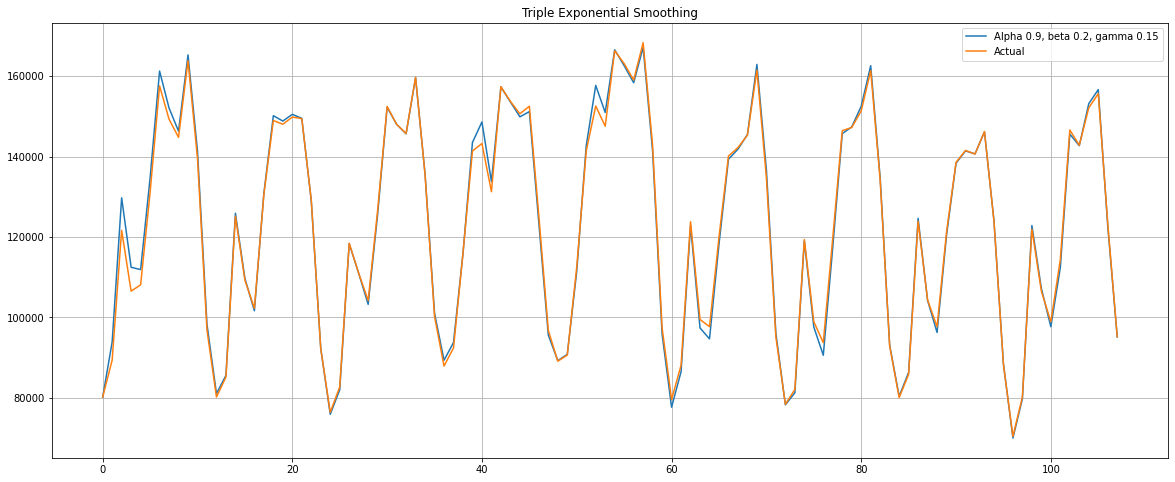

In [55]:
# plotting for least MSE for 2 hour according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 24,[0.9], [0.2], [.15], 2)

In [56]:
#prediction of alpha beta gamma for minimum MSE for 4 hour inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .3 with interval = 4 hour    is " ,MSE_TES(data,24, .9, .2 , .3,interval=4), "\n")
print("MSE for alpha =.85, beta = .25, gamma = .15 with interval = 4 hour is " ,MSE_TES(data,24, .85, .25 , .15,interval=4), "\n")
print("MSE for alpha =.8, beta = .2, gamma = .2 with interval = 4 hour    is " ,MSE_TES(data,24, .8, .2 , .2,interval=4), "\n")

MSE for alpha =.9, beta = .2, gamma = .3 with interval = 4 hour    is  4008684.5520078926 

MSE for alpha =.85, beta = .25, gamma = .15 with interval = 4 hour is  4957430.705078556 

MSE for alpha =.8, beta = .2, gamma = .2 with interval = 4 hour    is  4927844.838245742 



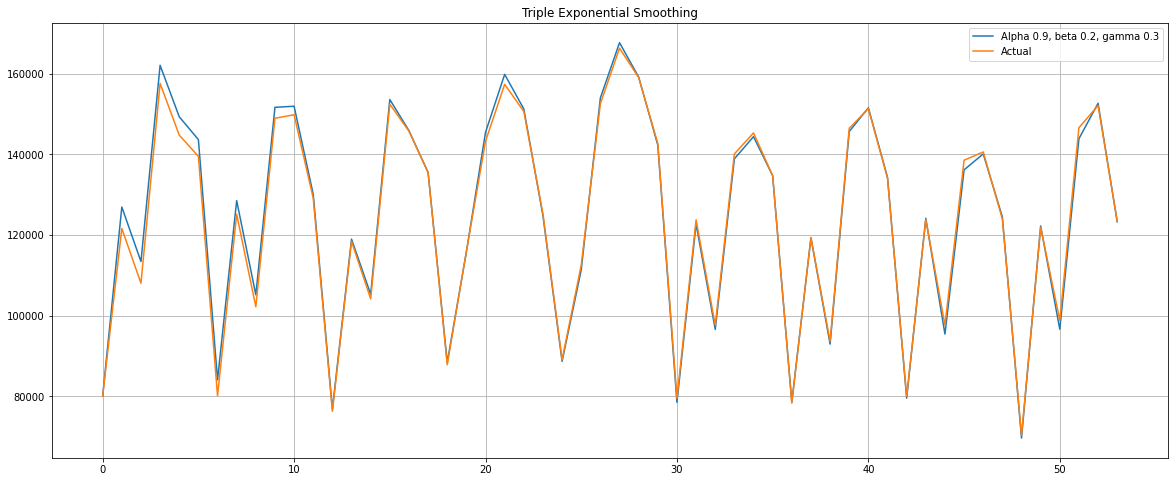

In [57]:
# plotting for least MSE for 4 hour according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 24,[0.9], [0.2], [.3], 4)

In [58]:
#prediction of alpha beta gamma for minimum MSE for different inervals for triple exponential smoothing

print("MSE for interval = 8 hour is " ,"unable to find as no of hour in seassion is 8", "\n")
print("MSE for interval = 12 hour is " ,"unable to find as no of hour in seassion is 12", "\n")
print("MSE for interval = 24 hour is " ,"unable to find as no of hour in seassion is 24", "\n")
print("MSE for interval = 48 hour is " ,"unable to find as no of hour in seassion is 48", "\n")

MSE for interval = 8 hour is  unable to find as no of hour in seassion is 8 

MSE for interval = 12 hour is  unable to find as no of hour in seassion is 12 

MSE for interval = 24 hour is  unable to find as no of hour in seassion is 24 

MSE for interval = 48 hour is  unable to find as no of hour in seassion is 48 



In [59]:
#tabulate minimum MSE for different intervals for triple exponential smoothing

from tabulate import tabulate
print(tabulate([['1 hour', 2335860], ['2 hour', 3267429],['4 hour', 4008684],['8 hour', 'unable to find as no of hour in seassion is 24'],['12 hour', 'unable to find as no of hour in seassion is 24'],['24 hour', "unable to find as no of hour in seassion is 24"],['48 hour', 'unable to find as no of hour in seassion is 24']], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   | minimum MSE                                    |
|-------------+------------------------------------------------|
| 1 hour      | 2335860                                        |
| 2 hour      | 3267429                                        |
| 4 hour      | 4008684                                        |
| 8 hour      | unable to find as no of hour in seassion is 24 |
| 12 hour     | unable to find as no of hour in seassion is 24 |
| 24 hour     | unable to find as no of hour in seassion is 24 |
| 48 hour     | unable to find as no of hour in seassion is 24 |


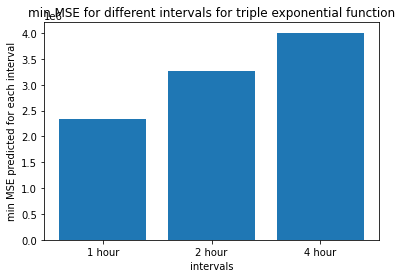

In [60]:
# Bar chart comparison for min MSE of different intervals for triple exponential function

import matplotlib.pyplot as plt
plt.bar(['1 hour','2 hour','4 hour'], [2335860, 3267429, 4008684])
plt.title('min MSE for different intervals for triple exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Comparison of inbuild function and self made function for single exponential smoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


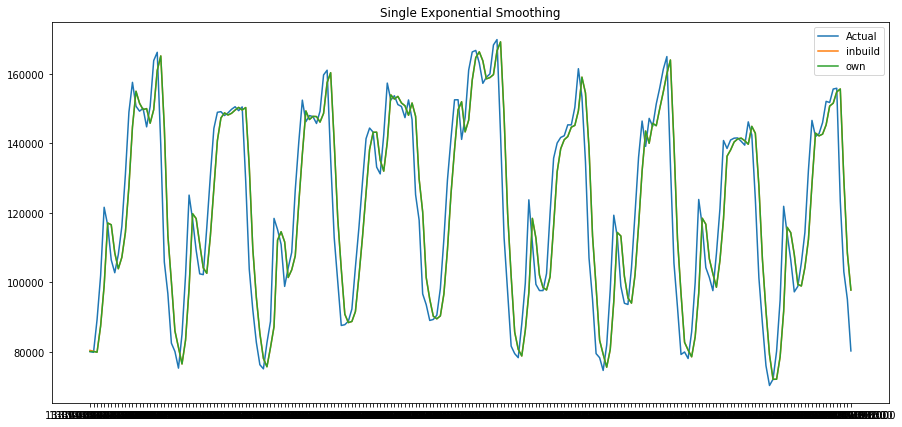

In [61]:
# comparison between inbuild and my own function graph for single exponential smoothing

p= D1
p['inbuild SES']=SimpleExpSmoothing(p['Ads']).fit(smoothing_level= .8 ,optimized=True).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Single Exponential Smoothing')
plt.plot(p['Ads'], label='Actual')
plt.plot(p['inbuild SES'], label='inbuild')
plt.plot(single_exponential_smoothing(data, .8,1), label='own')
plt.legend()

In [68]:
#MSE comparision between inbuild function and own function for single exponential smoothing

inbuildMSE_SES = np.square(np.subtract(p['Ads'],p['inbuild SES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_SES, "\n")
print("MSE by my own function  is " ,MSE_SES(data, .85,1), "\n")

MSE by inbuild function is  180650036.51090157 

MSE by my own function  is  168803562.00671294 



#Comparison of inbuild function and self made function for Double exponential smoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


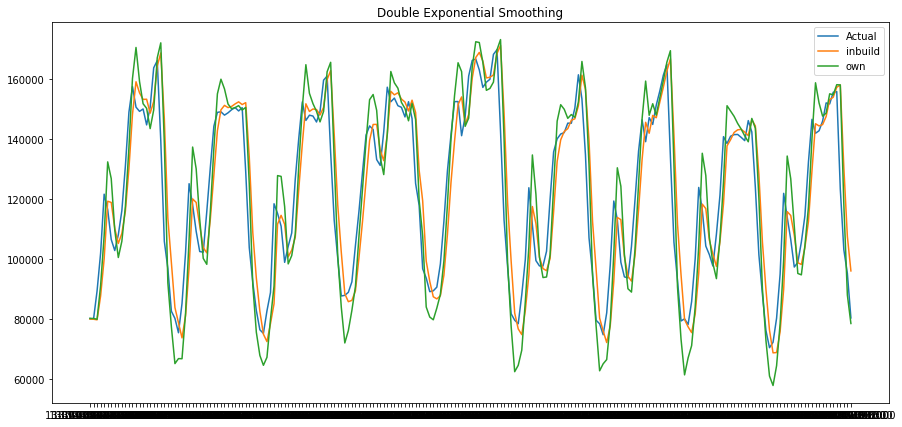

In [63]:
# comparison between inbuild and my own function graph for double exponential smoothing

q= D1
q['inbuild DES']=Holt(q['Ads']).fit(smoothing_level= .8 , smoothing_slope=.06, optimized=False).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Double Exponential Smoothing')
plt.plot(q['Ads'], label='Actual')
plt.plot(q['inbuild DES'], label='inbuild')
plt.plot(double_exponential_smoothing(data, .8,.5, 1), label='own')
plt.legend()


In [69]:
#MSE comparision between inbuild function and own function for double exponential smoothing

inbuildMSE_DES = np.square(np.subtract(q['Ads'],q['inbuild DES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_DES, "\n")
print("MSE by my own function  is " ,MSE_DES(data, .85, .5,1), "\n")

MSE by inbuild function is  190559499.81515515 

MSE by my own function  is  161936512.939597 



# Comparison of inbuild function and self made function for Triple exponential smoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


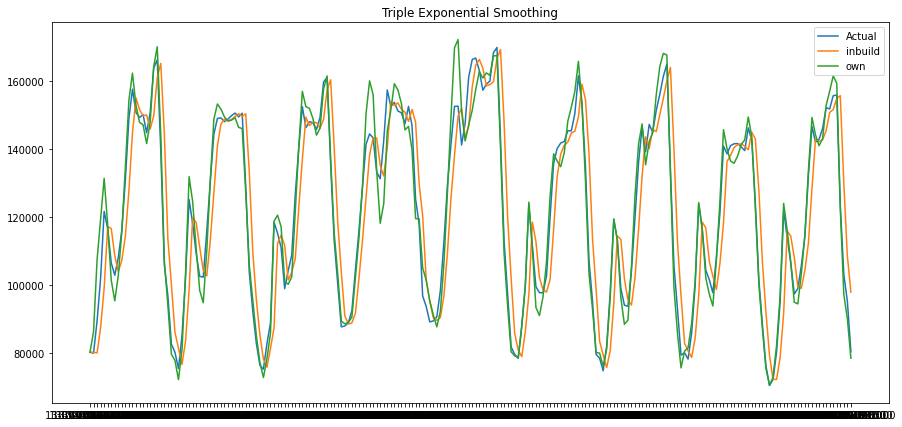

In [65]:
# comparison between inbuild and my own function graph for triple exponential smoothing

r= D1
r['inbuild TES']=ExponentialSmoothing(r['Ads']).fit(smoothing_level= .8 , smoothing_slope=.06, smoothing_seasonal=0.95, optimized=False).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Triple Exponential Smoothing')
plt.plot(r['Ads'], label='Actual')
plt.plot(r['inbuild TES'], label='inbuild')
plt.plot(triple_exponential_smoothing(data,24,.5, .8,.5, 1), label='own')
plt.legend()

In [70]:
#MSE comparision between inbuild function and own function for triple exponential smoothing

inbuildMSE_TES = np.square(np.subtract(r['Ads'],r['inbuild TES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_TES, "\n")
print("MSE by my own function  is " ,MSE_TES(data, 24,.5,.7, .85,1), "\n")

MSE by inbuild function is  180650995.23190615 

MSE by my own function  is  74217798.97495371 

